<a href="https://colab.research.google.com/github/Chochoho/AIFFEL_quest_cr/blob/main/%EC%BC%80%EC%B0%BD%EB%94%A5/4%EB%8B%A8%EC%9B%90-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6789 - loss: 0.6205 - val_accuracy: 0.8562 - val_loss: 0.4189
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8894 - loss: 0.3631 - val_accuracy: 0.8797 - val_loss: 0.3270
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9197 - loss: 0.2572 - val_accuracy: 0.8886 - val_loss: 0.2869
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9375 - loss: 0.2000 - val_accuracy: 0.8871 - val_loss: 0.2788
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9494 - loss: 0.1652 - val_accuracy: 0.8882 - val_loss: 0.2767
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9600 - loss: 0.1393 - val_accuracy: 0.8854 - val_loss: 0.2931
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9620 - loss: 0.1241 - val_accuracy: 0.8838 - val_loss: 0.2927
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9711 - loss: 0.1020 - val_accuracy: 0.8834 - v

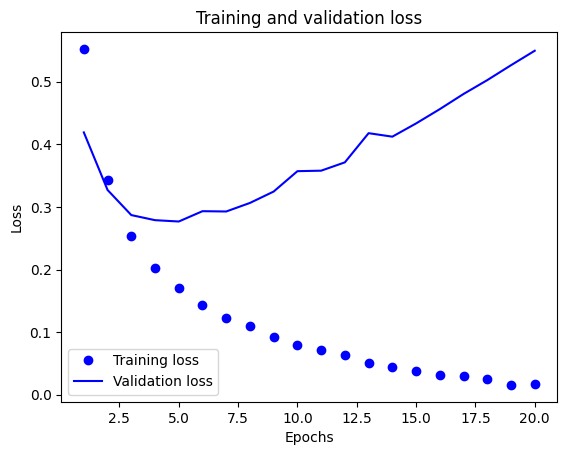

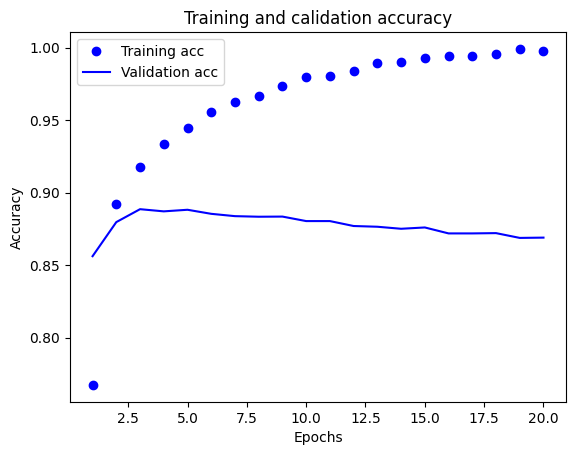

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7313 - loss: 0.5766
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8943 - loss: 0.3139
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9213 - loss: 0.2296
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9333 - loss: 0.1937
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8860 - loss: 0.2802


In [28]:
#영화 리뷰 분류 : 이진 분류 문제
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])
decoded_review="".join([reverse_word_index.get(i-3,"?")for i in train_data[0]])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1, len(loss_values)+1)
val_loss_values=history_dict["val_loss"]
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and calidation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)




Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.4093 - loss: 3.2499 - val_accuracy: 0.6180 - val_loss: 1.8396
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6619 - loss: 1.6451 - val_accuracy: 0.7000 - val_loss: 1.3790
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7357 - loss: 1.2356 - val_accuracy: 0.7270 - val_loss: 1.2020
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7844 - loss: 1.0104 - val_accuracy: 0.7700 - val_loss: 1.0880
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8238 - loss: 0.8216 - val_accuracy: 0.7780 - val_loss: 1.0271
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8467 - loss: 0.7008 - val_accuracy: 0.7960 - val_loss: 0.9387
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8790 - loss: 0.5882 - val_accuracy: 0.8070 - val_loss: 0.9041
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9018 - loss: 0.4725 - val_accuracy: 0.8180 - 

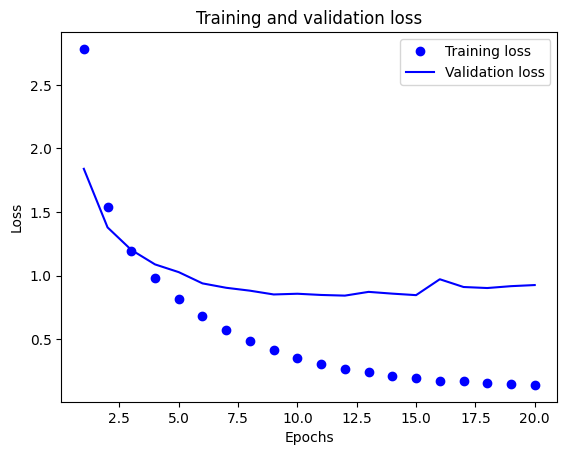

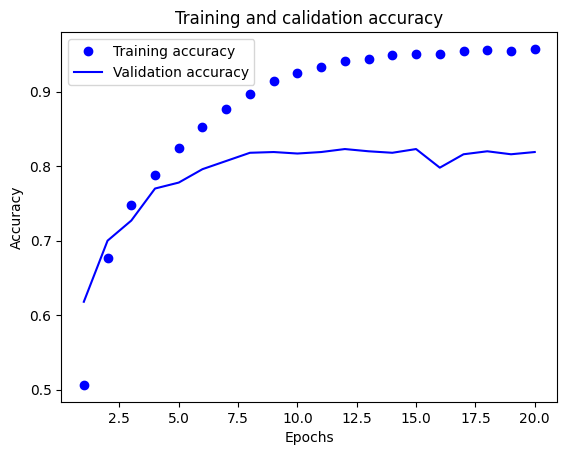

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3852 - loss: 3.3575
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6145 - loss: 1.8646
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7212 - loss: 1.3087
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7649 - loss: 1.0929
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8097 - loss: 0.8985
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8313 - loss: 0.7608
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8608 - loss: 0.6486
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8788 - loss: 0.5578
Epoch 9/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9009 - loss: 0.4729
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7818 - loss: 0.9338
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/20


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 46), output.shape=(None, 46)

In [32]:
#뉴스 기사 분류 : 다중 분류 문제

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

len(train_data)
len(test_data)

word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire="".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

train_labels[10]

word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire="".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results
y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and calidation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512)
results=model.evaluate(x_test, y_test)

import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
hits_array.mean()

predictions=model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

y_train=np.array(train_labels)
y_test=np.array(test_labels)

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


